In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy import stats
import calendar
import datetime

cwd = os.getcwd()
#print(cwd)

In [2]:
# Load the CSV data into a Pandas DataFrame
data = pd.read_csv('clean_median_sale_price_v2_df.csv', index_col=0)
data.head()

,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,"New York, NY",NY,344911.0,339350.0,335350.0,333517.0,342000.0,356000.0,371000.0,380667.0,...,543333.0,528333.0,518333.0,515333.0,509500.0,510333.0,516667.0,535833.0,558333.0,579667.0
1,"Los Angeles, CA",CA,394000.0,397333.0,407333.0,430667.0,450667.0,465000.0,468333.0,471667.0,...,852000.0,840333.0,827000.0,818333.0,816667.0,827333.0,839000.0,854000.0,873333.0,888333.0
2,"Chicago, IL",IL,162833.0,158000.0,160218.0,170218.0,183385.0,197833.0,207500.0,212333.0,...,285000.0,278333.0,273333.0,270000.0,269000.0,275633.0,287300.0,300300.0,313167.0,319833.0
3,"Dallas, TX",TX,151667.0,152167.0,155333.0,164500.0,172800.0,178467.0,181633.0,181125.0,...,390500.0,382500.0,373333.0,363333.0,362333.0,367000.0,377000.0,384667.0,395000.0,400333.0
4,"Houston, TX",TX,149833.0,148572.0,150405.0,160155.0,167417.0,174900.0,177650.0,178650.0,...,321000.0,316000.0,310667.0,306000.0,304333.0,306333.0,313333.0,321667.0,328667.0,333667.0


In [3]:
# Author: anderoos
# This script is meant to break up Zillow Data from the continental US into five distinct regions
# West, Midwest, Southwest, Southeast, Northeast
def split_regions(df):
    df['StateName'] = df['StateName'].astype('str')
    # Define categories
    northeast = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA']
    southeast = ['DE', 'MD', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'AL', 'MS', 'LA', 'KY', 'TN']
    midwest = ['OH', 'IN', 'IL', 'MI', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS']
    west = ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'CA', 'OR', 'WA', 'AK', 'HI']
    southwest = ['TX', 'OK', 'AR']
    # Filters state codes into separate dataframes
    ne_df = df[df['StateName'].isin(northeast)]
    se_df = df[df['StateName'].isin(southeast)]
    mw_df = df[df['StateName'].isin(midwest)]
    w_df = df[df['StateName'].isin(west)]
    sw_df = df[df['StateName'].isin(southwest)]
    return ne_df, se_df, mw_df, w_df, sw_df

In [4]:
# Split the data into regions
ne_df, se_df, mw_df, w_df, sw_df = split_regions(data)

In [5]:
mw_df.head()

,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
2,"Chicago, IL",IL,162833.0,158000.0,160218.0,170218.0,183385.0,197833.0,207500.0,212333.0,...,285000.0,278333.0,273333.0,270000.0,269000.0,275633.0,287300.0,300300.0,313167.0,319833.0
13,"Detroit, MI",MI,114133.0,111833.0,112833.0,117333.0,125000.0,131667.0,139417.0,145083.0,...,241167.0,234434.0,226767.0,216100.0,215167.0,218665.0,230332.0,239498.0,252000.0,258667.0
15,"Minneapolis, MN",MN,164000.0,161000.0,165000.0,171667.0,182500.0,191784.0,200117.0,203284.0,...,346500.0,339333.0,330500.0,325750.0,322584.0,327584.0,335633.0,345800.0,359133.0,364167.0
20,"St. Louis, MO",MO,135683.0,133600.0,135267.0,139083.0,146083.0,153067.0,157617.0,158250.0,...,236869.0,233036.0,229858.0,223667.0,220333.0,218667.0,227333.0,234000.0,248333.0,255333.0
27,"Cincinnati, OH",OH,134683.0,134017.0,137433.0,141000.0,148333.0,153600.0,156683.0,154850.0,...,245583.0,242750.0,238167.0,230167.0,228833.0,230167.0,243500.0,255000.0,267250.0,270583.0


In [6]:
mw_df_states = mw_df.drop(columns=['RegionName'])
mw_df_states = mw_df_states.groupby('StateName').mean()
#mw_df_states.to_csv("test.csv")
mw_df_states

,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
StateName,,,,,,,,,,,,,,,,,,,,,
IA,128310.200000,127116.600000,126450.200000,129716.800000,134366.600000,141450.000000,144916.600000,145000.000000,142033.400000,140666.600000,...,229967.600000,227634.200000,219000.000000,221100.000000,216896.800000,228860.000000,231643.200000,240780.200000,239883.400000,244833.400000
IL,102308.823529,100248.058824,100880.411765,103018.705882,108112.764706,113648.058824,116472.705882,116071.529412,112563.647059,108735.058824,...,149753.411765,145774.058824,143913.058824,138547.176471,135865.588235,135745.117647,143177.352941,151005.941176,159298.117647,163911.764706
IN,100977.200000,98494.066667,97575.066667,100324.000000,106648.466667,112522.200000,116861.133333,115249.933333,112166.666667,109355.600000,...,197640.800000,196071.733333,195321.533333,188836.600000,187973.333333,188942.200000,197160.600000,204165.000000,211973.333333,215765.666667
KS,110550.000000,105483.000000,111175.000000,117825.000000,125925.000000,130650.000000,131333.000000,129967.000000,125800.000000,122800.000000,...,208083.000000,208350.000000,208440.000000,198190.000000,194423.000000,187100.000000,205767.000000,217600.000000,230833.000000,226000.000000
MI,103791.227273,99981.227273,101064.500000,104814.318182,110656.045455,115903.590909,119763.363636,119608.954545,118623.590909,115295.136364,...,213900.045455,209222.000000,202079.454545,194765.090909,191569.727273,195002.000000,204357.454545,216069.727273,226646.818182,233140.272727
MN,132226.181818,131158.727273,131343.727273,135009.181818,139300.181818,148077.272727,152637.909091,155074.272727,150059.000000,148258.909091,...,250332.181818,244337.636364,234237.636364,226395.454545,225768.272727,232334.909091,242843.090909,250712.818182,264379.909091,272795.181818
MO,119337.500000,118420.800000,118717.400000,119303.400000,125012.600000,128510.900000,135295.800000,133534.600000,130019.700000,125494.900000,...,227156.000000,224790.000000,220985.000000,216117.500000,213747.700000,215529.900000,220905.000000,229520.000000,237081.700000,240791.500000
ND,169241.500000,173000.000000,173750.000000,174525.500000,172434.000000,172850.500000,179650.000000,184950.000000,186916.500000,186241.500000,...,288946.000000,283241.500000,279592.000000,265166.500000,264167.000000,264550.000000,275725.000000,282825.000000,295250.000000,298650.000000
NE,129491.500000,127741.500000,129000.000000,130907.000000,135907.000000,140573.500000,143625.000000,142750.000000,140166.500000,137375.000000,...,257620.500000,253996.000000,250170.500000,248458.500000,247375.000000,253291.500000,260175.000000,270966.500000,280917.000000,286450.000000


In [7]:
#author: PSam
number_of_periods = len(mw_df_states.columns)

growth_rate_by_state = pd.DataFrame({
    "Growth Rate":((mw_df_states["7/31/2023"] / 
                           mw_df_states["1/31/2013"])**(12/number_of_periods)-1)
})

top_state = growth_rate_by_state["Growth Rate"].nlargest(1).index
bottom_state = growth_rate_by_state["Growth Rate"].nsmallest(1).index

top_state

Index(['MI'], dtype='object', name='StateName')

In [9]:
# Transpose the DataFrame to have dates on the x-axis and NH values on the y-axis
top_state_df = mw_df[mw_df['StateName'] == top_state[0]]
top_state_df = top_state_df.drop(columns=["RegionName"])
top_state_df

,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
13,MI,114133.0,111833.0,112833.0,117333.0,125000.0,131667.0,139417.0,145083.0,145083.0,...,241167.0,234434.0,226767.0,216100.0,215167.0,218665.0,230332.0,239498.0,252000.0,258667.0
51,MI,118633.0,117967.0,120467.0,125467.0,130800.0,133683.0,136017.0,135683.0,135317.0,...,285667.0,279917.0,270917.0,264250.0,265000.0,275000.0,286667.0,301667.0,308333.0,316633.0
104,MI,101250.0,94667.0,94600.0,97517.0,108667.0,113400.0,118150.0,119333.0,118000.0,...,183317.0,179667.0,179500.0,171917.0,166852.0,169468.0,178302.0,193867.0,202083.0,208267.0
130,MI,82483.0,76317.0,76333.0,78000.0,85667.0,90915.0,95898.0,98565.0,99983.0,...,184667.0,177983.0,176483.0,172150.0,170833.0,170333.0,179667.0,190000.0,197000.0,200333.0
142,MI,180950.0,164950.0,165300.0,177000.0,192333.0,206083.0,209417.0,210750.0,212667.0,...,339833.0,335000.0,332665.0,322665.0,315998.0,315000.0,349661.0,382994.0,411078.0,412583.0
180,MI,124633.0,122967.0,120800.0,125333.0,127833.0,131550.0,134883.0,136622.0,135905.0,...,231667.0,226417.0,215333.0,205517.0,202433.0,218517.0,230167.0,236833.0,243500.0,250000.0
217,MI,80667.0,85667.0,86083.0,86083.0,86617.0,92367.0,99200.0,101150.0,96517.0,...,151333.0,148333.0,141833.0,141983.0,142483.0,145650.0,144500.0,145133.0,153855.0,158438.0
229,MI,84967.0,81000.0,84500.0,94483.0,98483.0,105650.0,109000.0,106667.0,102233.0,...,209150.0,196817.0,191817.0,185333.0,178833.0,174458.0,174533.0,188700.0,199408.0,210457.0
244,MI,73333.0,65167.0,69500.0,69000.0,79167.0,85000.0,89772.0,91105.0,92605.0,...,172500.0,162500.0,160833.0,158333.0,161633.0,153300.0,161633.0,168317.0,182950.0,189617.0
253,MI,142800.0,140967.0,133833.0,134333.0,140400.0,158100.0,156600.0,152700.0,144433.0,...,232333.0,218300.0,214133.0,202467.0,209000.0,205500.0,213833.0,233667.0,259833.0,269500.0


In [11]:
# Groupby to average the values of top state - NH
mw_top_state_gb = top_state_df.groupby("StateName").mean()

# Created forloop to assign a number to each column to calculate linear regression
num = 1

for i in range(len(mw_top_state_gb.columns)):
    mw_top_state_gb.loc["Time Period", mw_top_state_gb.columns[i]] = num
    num += 1

mw_top_state_gb


,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
StateName,,,,,,,,,,,,,,,,,,,,,
MI,103791.227273,99981.227273,101064.5,104814.318182,110656.045455,115903.590909,119763.363636,119608.954545,118623.590909,115295.136364,...,213900.045455,209222.0,202079.454545,194765.090909,191569.727273,195002.0,204357.454545,216069.727273,226646.818182,233140.272727
Time Period,1.000000,2.000000,3.0,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,...,118.000000,119.0,120.000000,121.000000,122.000000,123.0,124.000000,125.000000,126.000000,127.000000


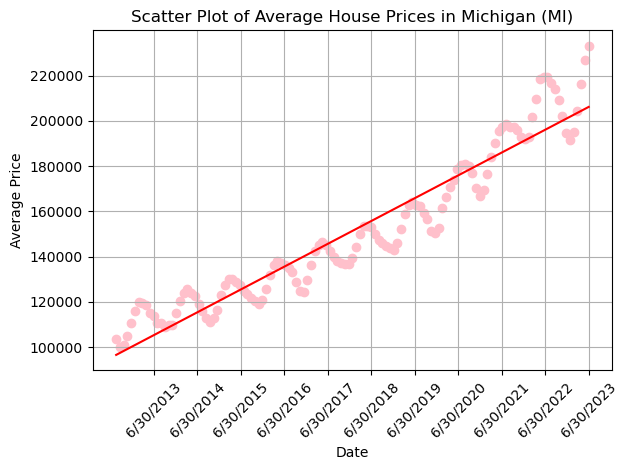

In [12]:
# Assign x and y values
x = mw_top_state_gb.loc['Time Period'].values
y = mw_top_state_gb.loc['MI'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

custom_x_ticks = ["6/30/2023", "6/30/2022", "6/30/2021","6/30/2020", "6/30/2019","6/30/2018",
                  "6/30/2017", "6/30/2016", "6/30/2015", "6/30/2014", "6/30/2013"]

# Create a scatter plot of the data points
plt.scatter(x, y, marker='o', color='pink', label='MI Average Prices')

# Add the linear regression line to the plot
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label='Regression Line')

# y = mx + b
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Annotate the line equation on the plot
plt.annotate(line_eq, (0, 350000), fontsize=15, color="red")

plt.title('Scatter Plot of Average House Prices in Michigan (MI)')
plt.xlabel('Date')
plt.ylabel('Average Price')

# Set custom tick locations and labels
tick_locations = np.linspace(len(mw_top_state_gb.columns), len(custom_x_ticks), num=len(custom_x_ticks))
plt.xticks(tick_locations, custom_x_ticks, rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.savefig("Images/Linear Regression/Midwest/Scatter Plot of Average House Prices in Michigan (MI).png")
plt.show()


In [14]:
value_predictions = pd.DataFrame(mw_top_state_gb["7/31/2023"])
value_predictions = value_predictions.drop("Time Period")

start_date = datetime.date(2023,8,31) # Starting from August 31, 2023
end_date = datetime.date(2025,12,31) # Ending on Dec 31, 2025
date_range = pd.date_range(start_date, end_date, freq='M')

x_places = 128

# Add columns for each month in the date range
for date in date_range:
    month_year = date.strftime('%m/%d/%Y')
    value_predictions[month_year] = round(slope, 2) * x_places + round(intercept, 2)
    x_places += 1

value_predictions = value_predictions.transpose()
value_predictions.index.name = "Month End"
value_predictions.columns.name = None

value_predictions


,MI
Month End,
7/31/2023,233140.272727
08/31/2023,207013.260000
09/30/2023,207882.880000
10/31/2023,208752.500000
11/30/2023,209622.120000
12/31/2023,210491.740000
01/31/2024,211361.360000
02/29/2024,212230.980000
03/31/2024,213100.600000


In [ ]:
# Repeat script for bottom state

In [17]:
# Transpose the DataFrame to have dates on the x-axis and NH values on the y-axis
bottom_state_df = mw_df[mw_df['StateName'] == bottom_state[0]]
bottom_state_df = bottom_state_df.drop(columns=["RegionName"])
bottom_state_df

,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
2,IL,162833.0,158000.0,160218.0,170218.0,183385.0,197833.0,207500.0,212333.0,205167.0,...,285000.0,278333.0,273333.0,270000.0,269000.0,275633.0,287300.0,300300.0,313167.0,319833.0
131,IL,103250.0,100917.0,106750.0,108833.0,115167.0,119333.0,123833.0,122500.0,117500.0,...,138250.0,134667.0,131000.0,127167.0,123500.0,123750.0,127583.0,137417.0,148333.0,153333.0
138,IL,115167.0,116000.0,115500.0,116500.0,118333.0,123333.0,124000.0,124667.0,121000.0,...,159125.0,159292.0,156958.0,151500.0,141333.0,140983.0,150317.0,162983.0,170667.0,176500.0
147,IL,90883.0,92217.0,95633.0,98667.0,105000.0,104583.0,103917.0,100917.0,96333.0,...,161500.0,156667.0,153333.0,146667.0,143333.0,143667.0,150333.0,158667.0,164167.0,167500.0
194,IL,124500.0,122333.0,126167.0,137500.0,137250.0,141000.0,139500.0,143583.0,140250.0,...,178833.0,171833.0,170833.0,160967.0,157883.0,154550.0,166500.0,176917.0,195250.0,205000.0
205,IL,114333.0,119833.0,122833.0,122083.0,120083.0,125250.0,129167.0,129417.0,126250.0,...,159917.0,148917.0,145583.0,137667.0,138667.0,138667.0,150000.0,154333.0,156000.0,156000.0
233,IL,140917.0,145083.0,148000.0,151667.0,149333.0,155667.0,157000.0,151000.0,145000.0,...,189633.0,191300.0,186333.0,183000.0,173833.0,180500.0,195833.0,211667.0,225000.0,231167.0
265,IL,92583.0,85583.0,85833.0,87900.0,90567.0,91233.0,95333.0,98475.0,99475.0,...,129583.0,127000.0,130000.0,132333.0,131000.0,133000.0,136833.0,139000.0,140667.0,134500.0
285,IL,96983.0,100650.0,95333.0,102833.0,110500.0,121667.0,115333.0,102967.0,92467.0,...,120650.0,116333.0,110333.0,113667.0,103417.0,106417.0,108067.0,119317.0,128650.0,133333.0
320,IL,98083.0,97167.0,98833.0,105667.0,111583.0,125250.0,126750.0,129500.0,125917.0,...,173667.0,165000.0,166000.0,156000.0,149833.0,141833.0,144000.0,164667.0,176667.0,191167.0


In [18]:
# Groupby to average the values of bottom state - NJ
mw_bottom_state_gb = bottom_state_df.groupby("StateName").mean()

# Created forloop to assign a number to each column to calculate linear regression
num = 1

for i in range(len(mw_bottom_state_gb.columns)):
    mw_bottom_state_gb.loc["Time Period", mw_bottom_state_gb.columns[i]] = num
    num += 1

mw_bottom_state_gb

,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
StateName,,,,,,,,,,,,,,,,,,,,,
IL,102308.823529,100248.058824,100880.411765,103018.705882,108112.764706,113648.058824,116472.705882,116071.529412,112563.647059,108735.058824,...,149753.411765,145774.058824,143913.058824,138547.176471,135865.588235,135745.117647,143177.352941,151005.941176,159298.117647,163911.764706
Time Period,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,...,118.000000,119.000000,120.000000,121.000000,122.000000,123.000000,124.000000,125.000000,126.000000,127.000000


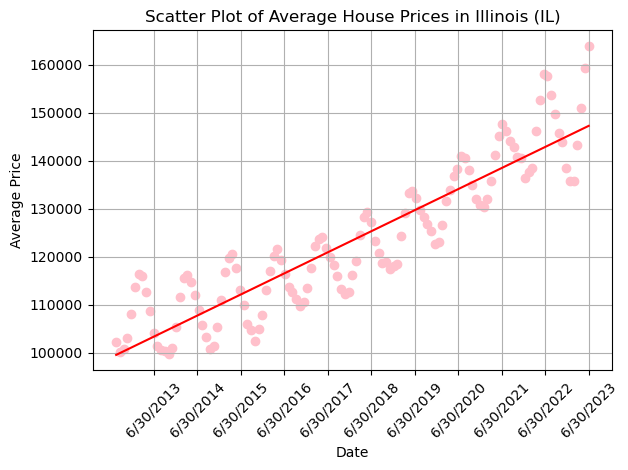

In [20]:
# Assign x and y values
x = mw_bottom_state_gb.loc['Time Period'].values
y = mw_bottom_state_gb.loc['IL'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

custom_x_ticks = ["6/30/2023", "6/30/2022", "6/30/2021","6/30/2020", "6/30/2019","6/30/2018",
                  "6/30/2017", "6/30/2016", "6/30/2015", "6/30/2014", "6/30/2013"]

# Create a scatter plot of the data points
plt.scatter(x, y, marker='o', color='pink', label='IL Average Prices')

# Add the linear regression line to the plot
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label='Regression Line')

# y = mx + b
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Annotate the line equation on the plot
plt.annotate(line_eq, (0, 350000), fontsize=15, color="red")

plt.title('Scatter Plot of Average House Prices in Illinois (IL)')
plt.xlabel('Date')
plt.ylabel('Average Price')

# Set custom tick locations and labels
tick_locations = np.linspace(len(mw_bottom_state_gb.columns), len(custom_x_ticks), num=len(custom_x_ticks))
plt.xticks(tick_locations, custom_x_ticks, rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.savefig("Images/Linear Regression/Midwest/Scatter Plot of Average House Prices in Illinois (IL).png")
plt.show()

In [22]:
value_predictions_bottom = pd.DataFrame(mw_bottom_state_gb["7/31/2023"])
value_predictions_bottom = value_predictions_bottom.drop("Time Period")

start_date = datetime.date(2023,8,31) # Starting from August 31, 2023
end_date = datetime.date(2025,12,31) # Ending on Dec 31, 2025
date_range = pd.date_range(start_date, end_date, freq='M')

x_places = 128

# Add columns for each month in the date range
for date in date_range:
    month_year = date.strftime('%m/%d/%Y')
    value_predictions_bottom[month_year] = round(slope, 2) * x_places + round(intercept, 2)
    x_places += 1

value_predictions_bottom = value_predictions_bottom.transpose()
value_predictions_bottom.index.name = "Month End"
value_predictions_bottom.columns.name = None

value_predictions_bottom

,IL
Month End,
7/31/2023,163911.764706
08/31/2023,147627.180000
09/30/2023,148005.590000
10/31/2023,148384.000000
11/30/2023,148762.410000
12/31/2023,149140.820000
01/31/2024,149519.230000
02/29/2024,149897.640000
03/31/2024,150276.050000


In [23]:
top_bottom_mw_states = value_predictions.merge(value_predictions_bottom, left_index=True, right_index=True)
top_bottom_mw_states.to_csv("Value Predictions for Top and Bottom MW States.csv")